<a href="https://colab.research.google.com/github/JohnEaganFS/CSCI191T/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CSCI 191T - Machine Learning
##Name: John Eagan 
##Assignment: Logistic Regression

In [692]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import random

## Sigmoid, F(w, x), and Classify Functions

In [693]:
def sigmoid(x):
  return 1.0/(1+math.exp(-x))

In [694]:
def F(W,X):
  return sum([w*x for w,x in zip(W,X)])

In [695]:
def classify(model, X): # Uses model to classify list of x values [(x0, x1, x2),...] into either 1 (positive) or 0 (negative).
  return [1 if sigmoid(F(model, x)) > 0.5 else 0 for x in X]

## Training Data 1

In [696]:
data = [((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]

### Visualizing the Data

In [697]:
def plotClasses(data): # Plots the data points according to if they are a positive or negative example (the class they belong to)
  X = [x for (x,r) in data]
  R = [r for (x,r) in data]

  xNeg = [x for (x,r) in data if r == 0] # Negative examples
  xPos = [x for (x,r) in data if r != 0] # Positive examples

  x1Pos = [x[1] for x in xPos]
  x2Pos = [x[2] for x in xPos]
  x1Neg = [x[1] for x in xNeg]
  x2Neg = [x[2] for x in xNeg]

  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.plot(x1Pos, x2Pos, "g+") # Positive examples shown as green plus symbols
  plt.plot(x1Neg, x2Neg, "ro") # Negative examples shown as red dots
  plt.show()

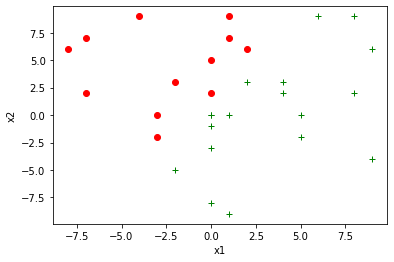

In [698]:
plotClasses(data)

### Building Model

In [699]:
alpha = 0.01
model = [0.01, 0.01, 0.01] # Initial model
X = [x for (x,r) in data]
R = [r for (x,r) in data]

In [700]:
def LogisticRegression(alpha, model, X, R, iterations): # Performs iterations of the Logistic Regression with Gradient Descent algorithm
  dimensions = len(X[0]) # number of dimensions
  N = len(X) # number of data points
  for i in range(iterations):
    deltaW = [0]*dimensions # initially, changes to each weight is 0
    for t in range(N): # for each data point
      yPredicted = sigmoid(F(model, X[t])) # calculate the predicted value using sigmoid(F(W,X)) with current model
      for j in range(dimensions): # for each weight
        deltaW[j] += -2 * (R[t] - yPredicted)*(yPredicted)*(1 - yPredicted)*X[t][j] # calculate the derivative (gradient) and increment change in weight by this amount
    for j in range(dimensions): # for each weight
      model[j] = model[j] - (1/N)*alpha*deltaW[j] # update current model by going in opposite direction of gradient
  return model

In [701]:
model = LogisticRegression(alpha, model, X, R, 100)

#### <font color="green">Final Model

In [702]:
print("Model Learned:", model) # Model after 100 iterations

Model Learned: [0.05161759068489734, 0.3099093240157539, -0.16724731105964472]


In [703]:
def plotModel(data, model): # Plots the original dataset with the line defined by the model included
  X = [x for (x,r) in data]
  R = [r for (x,r) in data]

  xNeg = [x for (x,r) in data if r == 0]
  xPos = [x for (x,r) in data if r != 0]

  x1Pos = [x[1] for x in xPos]
  x2Pos = [x[2] for x in xPos]
  x1Neg = [x[1] for x in xNeg]
  x2Neg = [x[2] for x in xNeg]

  M = lambda W, X1: [(-W[0]/W[2]) - (W[1]/W[2]) * x1 for x1 in X1] # calculates the X2 values for a set of X1 values according to a model
  modelX1 = [x[1] for x in X]
  modelX2 = M(model, modelX1)

  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.plot(x1Pos, x2Pos, "g+")
  plt.plot(x1Neg, x2Neg, "ro")
  plt.plot(modelX1, modelX2, "b", linewidth=0.5) # Plot the model line in blue
  plt.show()

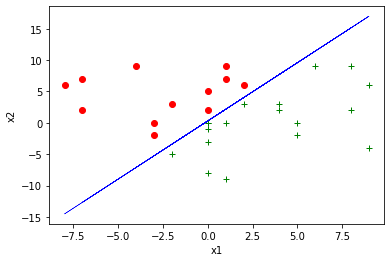

In [704]:
plotModel(data, model)

The model creates a clear distinction between the two classes.

#### Model Results on Original Data

In [705]:
def testModel(data, model): # Tests the model on the original data and prints out some statistics about its performance
  X = [x for (x,r) in data]
  R = [r for (x,r) in data]
  R = [r if r == 0 else 1 for r in R] # Had to change R values !=0 to 1's to make things easier for iris dataset
  N = len(X)
  predictions = classify(model, X) # Classify according to the final model learned
  truePos = sum([1 for (r,y) in zip(R, predictions) if r == y and r == 1])
  trueNeg = sum([1 for (r,y) in zip(R, predictions) if r == y and r == 0])
  falsePos = sum([1 for (r,y) in zip(R, predictions) if r != y and r == 0])
  falseNeg = sum([1 for (r,y) in zip(R, predictions) if r != y and r == 1])
  
  accuracy = (truePos + trueNeg) / N # How often we got the correct result
  precision = truePos / (truePos + falsePos) # How often we predicted positive and it actually was
  recall = truePos / (truePos + falseNeg) # How many of the actual positive examples were classified positive
  f1 = 2*recall*precision / (recall + precision) # Combination of recall and precision for overall performance

  print("True Pos:", truePos)
  print("True Neg:", trueNeg)
  print("False Pos:", falsePos)
  print("False Neg:", falseNeg)
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1:", f1)

In [706]:
testModel(data, model)

True Pos: 18
True Neg: 12
False Pos: 0
False Neg: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


As expected, the model can classify the two classes perfectly on the original dataset.

## Training Data 2

In [707]:
data = [((1, 0, 0), 0), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 0), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 1), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]

### Visualizing the Data

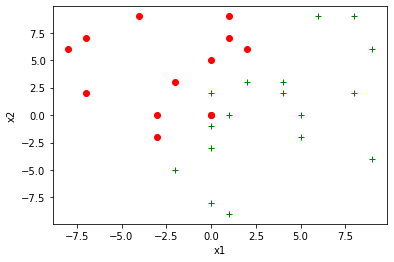

In [708]:
plotClasses(data)

### Building Model

In [709]:
alpha = 0.01
model = [0.01, 0.01, 0.01] # Initial model
X = [x for (x,r) in data]
R = [r for (x,r) in data]

In [710]:
model = LogisticRegression(alpha, model, X, R, 100)

#### <font color="green">Final Model

In [711]:
print("Model Learned:", model)  # Model after 100 iterations

Model Learned: [0.03431692304020504, 0.3063478176860939, -0.15441062746292988]


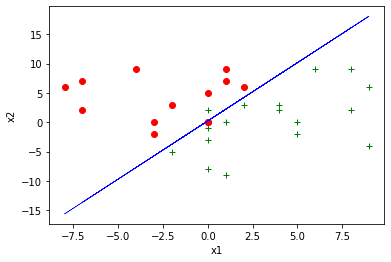

In [712]:
plotModel(data, model)

This time, there are a couple data points that make it impossible to draw a perfect separating line between the two classes.

#### Model Results on Original Data

In [713]:
testModel(data, model)

True Pos: 16
True Neg: 11
False Pos: 2
False Neg: 1
Accuracy: 0.9
Precision: 0.8888888888888888
Recall: 0.9411764705882353
F1: 0.9142857142857143


Predictably, the model misclassifies a few data points.

## Training Data 3

In [714]:
data = [((1, 2, 7), 0), ((1, 19, 72), 0), ((1, -39, -20), 0), ((1, 86, 95), 1), ((1, 45, 37), 1), ((1, 52, -23), 1), ((1, -8, -8), 0), ((1, 67, 93), 1), ((1, 46, 21), 1), ((1, 18, -97), 1), ((1, -78, 70), 0), ((1, -9, -17), 1), ((1, 94, -40), 1), ((1, 11, -3), 1), ((1, -24, -59), 1), ((1, 25, 33), 1), ((1, -71, 23), 0), ((1, -34, -7), 0), ((1, 55, -3), 1), ((1, -5, -33), 1), ((1, -22, 38), 0), ((1, 94, 66), 1), ((1, 4, -89), 1), ((1, -9, 26), 0), ((1, -83, 61), 0), ((1, 19, 98), 0), ((1, -1, 55), 0), ((1, -43, 90), 0), ((1, 86, 27), 1), ((1, 24, 69), 0)]

### Visualizing the Data

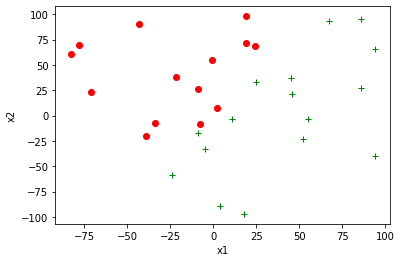

In [715]:
plotClasses(data)

### Building Model

In [716]:
alpha = 0.01
model = [0.01, 0.01, 0.01] # Initial model
X = [x for (x,r) in data]
R = [r for (x,r) in data]

In [717]:
model = LogisticRegression(alpha, model, X, R, 100)

#### <font color="green">Final Model

In [718]:
print("Model Learned:", model)  # Model after 100 iterations

Model Learned: [0.013023555787017707, 0.18933092869711407, -0.11157264987117092]


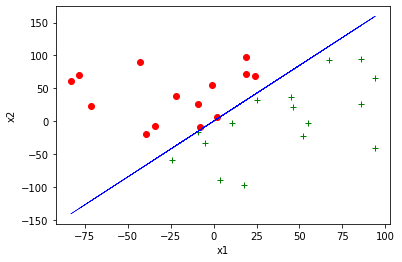

In [719]:
plotModel(data, model)

The model is very close to not being able to classify a few of the data points, but it seems to have learned just enough.

#### Model Results on Original Data

In [720]:
testModel(data, model)

True Pos: 16
True Neg: 14
False Pos: 0
False Neg: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


The model ended up being able to classify all of the points perfectly.

## Training Data 4

In [721]:
data = [((1, 5.1, 3.5), 0), ((1, 4.9, 3.0), 0), ((1, 4.7, 3.2), 0), ((1, 4.6, 3.1), 0), ((1, 5.0, 3.6), 0), ((1, 5.4, 3.9), 0), ((1, 4.6, 3.4), 0), ((1, 5.0, 3.4), 0), ((1, 4.4, 2.9), 0), ((1, 4.9, 3.1), 0), ((1, 5.4, 3.7), 0), ((1, 4.8, 3.4), 0), ((1, 4.8, 3.0), 0), ((1, 4.3, 3.0), 0), ((1, 5.8, 4.0), 0), ((1, 5.7, 4.4), 0), ((1, 5.4, 3.9), 0), ((1, 5.1, 3.5), 0), ((1, 5.7, 3.8), 0), ((1, 5.1, 3.8), 0), ((1, 5.4, 3.4), 0), ((1, 5.1, 3.7), 0), ((1, 4.6, 3.6), 0), ((1, 5.1, 3.3), 0), ((1, 4.8, 3.4), 0), ((1, 5.0, 3.0), 0), ((1, 5.0, 3.4), 0), ((1, 5.2, 3.5), 0), ((1, 5.2, 3.4), 0), ((1, 4.7, 3.2), 0), ((1, 4.8, 3.1), 0), ((1, 5.4, 3.4), 0), ((1, 5.2, 4.1), 0), ((1, 5.5, 4.2), 0), ((1, 4.9, 3.1), 0), ((1, 5.0, 3.2), 0), ((1, 5.5, 3.5), 0), ((1, 4.9, 3.6), 0), ((1, 4.4, 3.0), 0), ((1, 5.1, 3.4), 0), ((1, 5.0, 3.5), 0), ((1, 4.5, 2.3), 0), ((1, 4.4, 3.2), 0), ((1, 5.0, 3.5), 0), ((1, 5.1, 3.8), 0), ((1, 4.8, 3.0), 0), ((1, 5.1, 3.8), 0), ((1, 4.6, 3.2), 0), ((1, 5.3, 3.7), 0), ((1, 5.0, 3.3), 0), ((1, 7.0, 3.2), 1), ((1, 6.4, 3.2), 1), ((1, 6.9, 3.1), 1), ((1, 5.5, 2.3), 1), ((1, 6.5, 2.8), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 1), ((1, 4.9, 2.4), 1), ((1, 6.6, 2.9), 1), ((1, 5.2, 2.7), 1), ((1, 5.0, 2.0), 1), ((1, 5.9, 3.0), 1), ((1, 6.0, 2.2), 1), ((1, 6.1, 2.9), 1), ((1, 5.6, 2.9), 1), ((1, 6.7, 3.1), 1), ((1, 5.6, 3.0), 1), ((1, 5.8, 2.7), 1), ((1, 6.2, 2.2), 1), ((1, 5.6, 2.5), 1), ((1, 5.9, 3.2), 1), ((1, 6.1, 2.8), 1), ((1, 6.3, 2.5), 1), ((1, 6.1, 2.8), 1), ((1, 6.4, 2.9), 1), ((1, 6.6, 3.0), 1), ((1, 6.8, 2.8), 1), ((1, 6.7, 3.0), 1), ((1, 6.0, 2.9), 1), ((1, 5.7, 2.6), 1), ((1, 5.5, 2.4), 1), ((1, 5.5, 2.4), 1), ((1, 5.8, 2.7), 1), ((1, 6.0, 2.7), 1), ((1, 5.4, 3.0), 1), ((1, 6.0, 3.4), 1), ((1, 6.7, 3.1), 1), ((1, 6.3, 2.3), 1), ((1, 5.6, 3.0), 1), ((1, 5.5, 2.5), 1), ((1, 5.5, 2.6), 1), ((1, 6.1, 3.0), 1), ((1, 5.8, 2.6), 1), ((1, 5.0, 2.3), 1), ((1, 5.6, 2.7), 1), ((1, 5.7, 3.0), 1), ((1, 5.7, 2.9), 1), ((1, 6.2, 2.9), 1), ((1, 5.1, 2.5), 1), ((1, 5.7, 2.8), 1), ((1, 6.3, 3.3), 2), ((1, 5.8, 2.7), 2), ((1, 7.1, 3.0), 2), ((1, 6.3, 2.9), 2), ((1, 6.5, 3.0), 2), ((1, 7.6, 3.0), 2), ((1, 4.9, 2.5), 2), ((1, 7.3, 2.9), 2), ((1, 6.7, 2.5), 2), ((1, 7.2, 3.6), 2), ((1, 6.5, 3.2), 2), ((1, 6.4, 2.7), 2), ((1, 6.8, 3.0), 2), ((1, 5.7, 2.5), 2), ((1, 5.8, 2.8), 2), ((1, 6.4, 3.2), 2), ((1, 6.5, 3.0), 2), ((1, 7.7, 3.8), 2), ((1, 7.7, 2.6), 2), ((1, 6.0, 2.2), 2), ((1, 6.9, 3.2), 2), ((1, 5.6, 2.8), 2), ((1, 7.7, 2.8), 2), ((1, 6.3, 2.7), 2), ((1, 6.7, 3.3), 2), ((1, 7.2, 3.2), 2), ((1, 6.2, 2.8), 2), ((1, 6.1, 3.0), 2), ((1, 6.4, 2.8), 2), ((1, 7.2, 3.0), 2), ((1, 7.4, 2.8), 2), ((1, 7.9, 3.8), 2), ((1, 6.4, 2.8), 2), ((1, 6.3, 2.8), 2), ((1, 6.1, 2.6), 2), ((1, 7.7, 3.0), 2), ((1, 6.3, 3.4), 2), ((1, 6.4, 3.1), 2), ((1, 6.0, 3.0), 2), ((1, 6.9, 3.1), 2), ((1, 6.7, 3.1), 2), ((1, 6.9, 3.1), 2), ((1, 5.8, 2.7), 2), ((1, 6.8, 3.2), 2), ((1, 6.7, 3.3), 2), ((1, 6.7, 3.0), 2), ((1, 6.3, 2.5), 2), ((1, 6.5, 3.0), 2), ((1, 6.2, 3.4), 2), ((1, 5.9, 3.0), 2)]

### Visualizing the Data

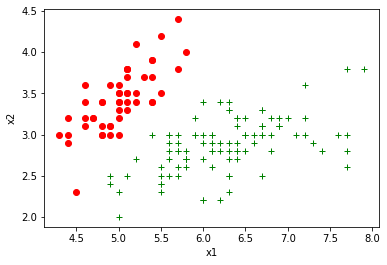

In [722]:
plotClasses(data)

The negative examples (0) are represented in red as usual. The other examples (1 and 2) are represented together as positive examples in green.

In [723]:
def plotAllClasses(data):
  X = [x for (x,r) in data]
  R = [r for (x,r) in data]

  random.seed(38)
  plt.xlabel("x1")
  plt.ylabel("x2")
  classes = list(set(R)) # remove duplicates to just get classes
  for i in classes:
    Xr = [x for (x,r) in data if r == i]
    x1r = [x[1] for x in Xr]
    x2r = [x[2] for x in Xr]
    rgb = [random.random(),random.random(),random.random()]
    plt.plot(x1r, x2r, c=rgb, marker="o", linestyle="")
  plt.show()

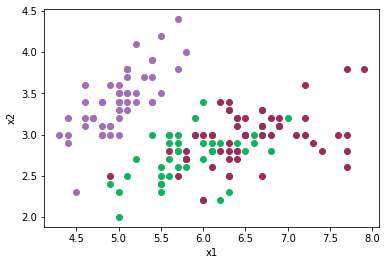

In [724]:
plotAllClasses(data)

This is the dataset with all classes as a different color.

### Building Model

It should be noted that I had to increase the learning rate drastically for this dataset. 0.5 seemed to be a good round value that doesn't start to diverge.

In [725]:
alpha = 0.5
model = [0.01, 0.01, 0.01] # Initial model
X = [x for (x,r) in data]
R = [r for (x,r) in data]

In [726]:
model = LogisticRegression(alpha, model, X, R, 10000)

I'm doing a lot more iterations because the learning was still too slow for only 100 iterations.

#### <font color="green">Final Model

In [727]:
print("Model Learned:", model)  # Model after 10,000 iterations

Model Learned: [-3.7686443761585244, 7.063889117104098, -10.822021573606472]


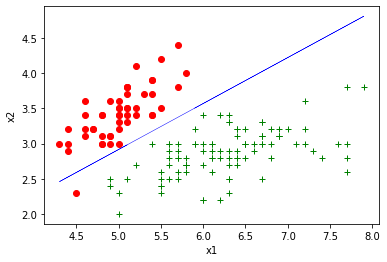

In [728]:
plotModel(data, model)

The model can separate the two classes aside from one point that seems to be a bit of an outlier. With enough iterations or an increased learning rate, the model can adjust for this point, but it takes a lot longer.

#### Model Results on Original Data

In [729]:
testModel(data, model)

True Pos: 100
True Neg: 49
False Pos: 1
False Neg: 0
Accuracy: 0.9933333333333333
Precision: 0.9900990099009901
Recall: 1.0
F1: 0.9950248756218906


Overall, the model does essentially a perfect job of classifying the 0 class vs the rest of the classes (1 and 2), but misses that single example.